$$\Large{ \textit{UNIVERSIDADE FEDERAL DO CEARÁ  } }$$

$$ \large{\textit{Departamento de Ciências da Computação }} $$


$$ \large{\textit{Mestrado e Doutorado em Ciências da Computação -  MDCC }} $$

<hr/>


$$\Large{{\textbf{ DISCIPLINA DE ÁLGEBRA LINEAR COMPUTACIONAL}}}$$

$$\large{\texttt{Docente: Professor Creto Vidal}}$$

$$\large{\texttt{Discente: Arnaldo Araújo}}$$
<hr/>


# MÉTODO DE GAUSS-SEIDEL

In [149]:
#realizando os imports para todo o projeto
import numpy as np
from scipy import linalg ## testes
from numpy import linalg as LA
from __future__ import print_function 
from pprint import pprint
from math import sqrt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import skfuzzy as fuzz
%matplotlib inline

In [137]:
A = np.mat([[20.,  10.0,  0.0,0.0,0.0,0.0       ],
        [ 10.0,  20.0,  10.0,0.0,0.0,0.0        ],
            [ 0.0,10.0,  20.0,  10.0,0.0,0.0        ],
            [ 0.0,  0,  10.0,20.0,10.0,0.0        ],
            [ 0.0,0.0,0.0, 10.0,  20.0,  10.0        ],
       [0.0,0.0,0.0,0.0,10.0,20.0]],dtype='f')
A

matrix([[ 20.,  10.,   0.,   0.,   0.,   0.],
        [ 10.,  20.,  10.,   0.,   0.,   0.],
        [  0.,  10.,  20.,  10.,   0.,   0.],
        [  0.,   0.,  10.,  20.,  10.,   0.],
        [  0.,   0.,   0.,  10.,  20.,  10.],
        [  0.,   0.,   0.,   0.,  10.,  20.]], dtype=float32)

In [138]:
Ateste = np.copy(A)
Ateste

array([[ 20.,  10.,   0.,   0.,   0.,   0.],
       [ 10.,  20.,  10.,   0.,   0.,   0.],
       [  0.,  10.,  20.,  10.,   0.,   0.],
       [  0.,   0.,  10.,  20.,  10.,   0.],
       [  0.,   0.,   0.,  10.,  20.,  10.],
       [  0.,   0.,   0.,   0.,  10.,  20.]], dtype=float32)

In [139]:
Ateste[1:,1]

array([ 20.,  10.,   0.,   0.,   0.], dtype=float32)

In [140]:
b = np.ones((6,1),dtype = float)
b[0,0] = -10. 
b[1,0] = 10. 
b[2,0]= 20.
b[3,0] = 20.
b[4,0] = 10.
b[5,0] = -10.
b

array([[-10.],
       [ 10.],
       [ 20.],
       [ 20.],
       [ 10.],
       [-10.]])

In [141]:
np.dot(Ateste[:,1],b)

array([ 300.])

In [142]:
np.cos(np.pi/6)*2

1.7320508075688774

In [143]:
m,n = Ateste.shape
C = np.cos(np.pi/m) + np.cos(np.pi/n)
C

1.7320508075688774

In [144]:
4/(np.sqrt((1.7320508075688774)**(2) + 4)+2)

0.86100174808612073

In [145]:
wopt = 4 /( 2 + np.sqrt( 4 + (C)**(2) ))
wopt

0.86100174808612073

In [146]:
'''
#solucao otima dos outros metodos

array([[-0.85714286],
       [ 0.71428571],
       [ 0.42857143],
       [ 0.42857143],
       [ 0.71428571],
       [-0.85714286]])


'''

'\n#solucao otima dos outros metodos\n\narray([[-0.85714286],\n       [ 0.71428571],\n       [ 0.42857143],\n       [ 0.42857143],\n       [ 0.71428571],\n       [-0.85714286]])\n\n\n'

In [147]:
#w = wopt
#w = 1.6457513110645907
w=0.0001
Vk0 = np.zeros((Ateste.shape[0],1))
Vk1  = np.zeros((Ateste.shape[0],1))
for i in range(0,Ateste.shape[0]):
    Vk0[i,0] = b[i]/Ateste[i,i]#settar a solucao inicial 
for _ in range(10000):
    for i in range(0,Ateste.shape[0]):
        s1  = np.dot(Ateste[i,:i-1],Vk1[:i-1])
        s2 = np.dot(Ateste[i,i+1:],Vk0[i+1:])
        Vk1[i,0] = (1-w)*Vk0[i,0] +  (w*(b[i] - s1 - s2))/Ateste[i,i])


SyntaxError: invalid syntax (<ipython-input-147-b138a900710d>, line 12)

In [22]:
Vk1

array([[-0.5     ],
       [ 0.49995 ],
       [ 0.99995 ],
       [ 0.999975],
       [ 0.500025],
       [-0.5     ]])

In [148]:
# Passo a Matriz
A = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0., 3., -1., 8.]])
# Vetor Resultado
b = np.array([6., 25., -11., 15.])

ITERATION_LIMIT = 1000 
epocas = ITERATION_LIMIT 

In [150]:
A

array([[ 10.,  -1.,   2.,   0.],
       [ -1.,  11.,  -1.,   3.],
       [  2.,  -1.,  10.,  -1.],
       [  0.,   3.,  -1.,   8.]])

In [151]:
b

array([  6.,  25., -11.,  15.])

In [153]:
b[0] - np.dot(A[0,:],b[:])

-7.0

In [155]:
1.2*b[0]

7.1999999999999993

In [21]:
# GAUSS SEIDEL 
from numpy import linalg as LA

def GAUSSSEIDEL(A,b,epocas):
    Verro = []
    #printar o sistema de equações
    print("Sistema: ")
    for i in range(A.shape[0]):
        row = ["{0:3g}*x{1}".format(A[i, j], j + 1) for j in range(A.shape[1])]
        print("[{0}] = [{1:3g}]".format(" + ".join(row), b[i]))
   
    x = np.zeros_like(b) 
    for k in range(A.shape[0]):
        x[k] = b[k]/A[k,k]  #settar a solucao inicial 
        
    
    #x = np.zeros_like(b) # teste se eu inicializo o vetor solução com zeros????
    
    #laço epocas
    
    for it_count in range(1, epocas): 
        x_new = np.zeros_like(x) # Receber a solucao "melhorada"
        print("Epoca {0}: {1}".format(it_count, x))
        for i in range(A.shape[0]): # Laço GAUSS SEIDEL
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        
        error = np.dot(A, x_new) - b
        NormaVetor = LA.norm(error)   # Tentar com o Erro Quadrático médio.
        Verro.append(NormaVetor) 
        if np.allclose(x, x_new, rtol=1e-5): 
            break
        x = x_new

    print("Solucao: {0}".format(x))
    error = np.dot(A, x) - b
    print("Erro: {0}".format(error))
    return( x,error,Verro )
    
    
    

In [22]:
vetorx,erroFinal,vertorErros = GAUSSSEIDEL(A,b,epocas)


Sistema: 
[ 10*x1 +  -1*x2 +   2*x3 +   0*x4] = [  6]
[ -1*x1 +  11*x2 +  -1*x3 +   3*x4] = [ 25]
[  2*x1 +  -1*x2 +  10*x3 +  -1*x4] = [-11]
[  0*x1 +   3*x2 +  -1*x3 +   8*x4] = [ 15]
Epoca 1: [ 0.6         2.27272727 -1.1         1.875     ]
Epoca 2: [ 1.04727273  1.75657025 -0.94629752  1.09799897]
Epoca 3: [ 0.96491653  1.97496565 -0.98568684  1.01117703]
Epoca 4: [ 0.99463393  1.99776509 -0.99803257  1.00108402]
Epoca 5: [ 0.99938302  1.99982713 -0.99978549  1.00009164]
Epoca 6: [ 0.99993981  1.99998904 -0.99997989  1.00000662]
Epoca 7: [ 0.99999488  1.99999956 -0.99999836  1.00000037]
Solucao: [ 0.99999488  1.99999956 -0.99999836  1.00000037]
Erro: [ -4.74478236e-05  -2.94703337e-07   6.25291250e-06   0.00000000e+00]


In [50]:
vertorErros = np.asanyarray(vertorErros)
indices = np.asanyarray(np.arange(0,vertorErros.shape[0]))
vertorErros

array([  2.73052133e+00,   3.80427759e-01,   5.17576858e-02,
         5.78659245e-03,   5.60531609e-04,   4.78589776e-05,
         3.56095470e-06])

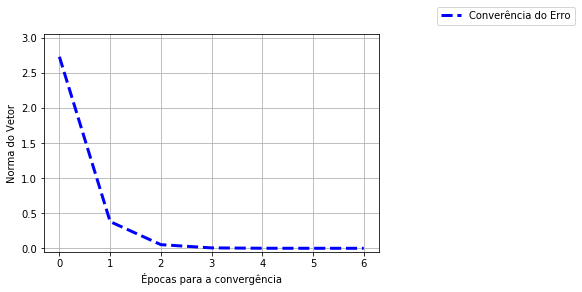

In [54]:
fig,ax = plt.subplots()
ax.plot(indices,vertorErros,'b--',linewidth=3,label='Converência do Erro')

ax.set_ylabel('Norma do Vetor')
ax.set_xlabel(' Épocas para a convergência ')
ax.set_ylim(-0.05, 3.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.grid(True)
plt.show()

## GAUSS-SEIDEL com SOR ( successive over relaxation )

In [134]:
# GAUSS SEIDEL 
from numpy import linalg as LA

def GS_SOR(A,b,w,epocas):
    Verro = []
    #printar o sistema de equações
    print("Sistema: ")
    for i in range(A.shape[0]):
        row = ["{0:3g}*x{1}".format(A[i, j], j + 1) for j in range(A.shape[1])]
        print("[{0}] = [{1:3g}]".format(" + ".join(row), b[i]))
   
    x = np.zeros_like(b) 
    for k in range(A.shape[0]):
        x[k] = b[k]/A[k,k]  #settar a solucao inicial 
        
    
    #x = np.zeros_like(b) # teste se eu inicializo o vetor solução com zeros????
    x_new = np.zeros_like(x) # Receber a solucao "melhorada"
    
    #laço epocas
    
    for it_count in range(1, epocas): 
        print("Epoca {0}: {1}".format(it_count, x))
        for i in range(A.shape[0]): # Laco GAUSS SEIDEL
            s1 = np.dot(A[i, :i], x_new[:i])
            print("Soma primeira metade {0}".format(s1))
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            print("Soma segunda metade{0}".format(s2))
            x_new[i] = (w*(b[i] - s1 - s2) / A[i, i]) + (1-w)*x[i]
        
        error = np.dot(A, x_new) - b
        NormaVetor = LA.norm(error)   # Tentar com o Erro Quadrático médio ao ínves da norma
        Verro.append(NormaVetor) 
        if np.allclose(x, x_new, rtol=1e-5): 
            break
        x = x_new

    print("Solucao: {0}".format(x))
    error = np.dot(A, x) - b
    print("Erro: {0}".format(error))
    return( x,error,Verro )


In [135]:
vetorx2,erroFinal2,vertorErros2 = GS_SOR(A,b,1.1,epocas)


Sistema: 


TypeError: unsupported format string passed to matrix.__format__

In [84]:
MT = []
MT = np.concatenate((A,b),axis = 1)


ValueError: all the input arrays must have same number of dimensions

In [87]:
A = np.asmatrix(A)
A

matrix([[ 10.,  -1.,   2.,   0.],
        [ -1.,  11.,  -1.,   3.],
        [  2.,  -1.,  10.,  -1.],
        [  0.,   3.,  -1.,   8.]])

In [92]:
b = np.asmatrix(b)
b = np.transpose(b)
b

matrix([[  6.],
        [ 25.],
        [-11.],
        [ 15.]])

In [94]:
m = np.concatenate((A,b),axis=1)
m

matrix([[ 10.,  -1.,   2.,   0.,   6.],
        [ -1.,  11.,  -1.,   3.,  25.],
        [  2.,  -1.,  10.,  -1., -11.],
        [  0.,   3.,  -1.,   8.,  15.]])

In [101]:
m = np.asarray(m)
m

array([[ 10.,  -1.,   2.,   0.,   6.],
       [ -1.,  11.,  -1.,   3.,  25.],
       [  2.,  -1.,  10.,  -1., -11.],
       [  0.,   3.,  -1.,   8.,  15.]])

In [128]:
# successive over-relaxation
#(m, w=1.25, x0=None, eps=1e-5, max_iteration=100)
def sor(m, w ,eps, max_iteration):
    n  = m.shape[0]
    x0 = np.ones_like(b) 
    for k in range(A.shape[0]):
        x0[k] = m[k,n-1]/A[k,k]  #settar a solucao inicial 
    x1 = x0[:]

    for it_count in range(max_iteration):
        print("Epoca {0}: Vetor encontrado:\n {1}".format(it_count, x1))

        for i in range(n):
            s = sum(-m[i][j] * x1[j] for j in range(n) if i != j)
            x1[i] = w*(m[i][n]+s)/m[i][i] + (1-w)*x0[i]
        if all(abs(x1[i]-x0[i]) < eps for i in range(n)):
            print("Valor encontrado na Época {0}".format(it_count))
            return x1 
        x0 = x1[:]
        raise ValueError('Solução não converge')

   

In [129]:
sor(m,1.25,1e-5,100)

Epoca 0: Vetor encontrado:
 [[ 0.        ]
 [ 0.27272727]
 [-0.1       ]
 [ 1.        ]]
Valor encontrado na Época 0


matrix([[ 0.80909091],
        [ 2.51239669],
        [-1.11322314],
        [ 0.74212293]])

In [ ]:
## module gaussSeidel
      ’’’ x,numIter,omega = gaussSeidel(iterEqs,x,tol = 1.0e-9)
          Gauss-Seidel method for solving [A]{x} = {b}.
          The matrix [A] should be sparse. User must supply the
          function iterEqs(x,omega) that returns the improved {x},
          given the current {x} (’omega’ is the relaxation factor).
      ’’’
      import numpy as np
      import math
      def gaussSeidel(iterEqs,x,tol = 1.0e-9):
          omega = 1.0
k = 10
p=1
for i in range(1,501):
              xOld = x.copy()
              x = iterEqs(x,omega)
              dx = math.sqrt(np.dot(x-xOld,x-xOld))
              if dx < tol: return x,i,omega
            # Compute relaxation factor after k+p iterations
              if i == k: dx1 = dx
              if i == k + p:
                  dx2 = dx
                  omega = 2.0/(1.0 + math.sqrt(1.0  \
                        - (dx2/dx1)**(1.0/p)))
          print(’Gauss-Seidel failed to converge’)

In [ ]:
import numpy as np

ITERATION_LIMIT = 1000 

# Passo a Matriz
A = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0., 3., -1., 8.]])
# Vetor Resulta
b = np.array([6., 25., -11., 15.])

print("System of equations:")
for i in range(A.shape[0]):
    row = ["{0:3g}*x{1}".format(A[i, j], j + 1) for j in range(A.shape[1])]
    print("[{0}] = [{1:3g}]".format(" + ".join(row), b[i]))

x = np.zeros_like(b)
for it_count in range(1, ITERATION_LIMIT):
    x_new = np.zeros_like(x)
    print("Iteration {0}: {1}".format(it_count, x))
    for i in range(A.shape[0]):
        s1 = np.dot(A[i, :i], x_new[:i])
        s2 = np.dot(A[i, i + 1:], x[i + 1:])
        x_new[i] = (b[i] - s1 - s2) / A[i, i]
    if np.allclose(x, x_new, rtol=1e-8):
        break
    x = x_new

print("Solution: {0}".format(x))
error = np.dot(A, x) - b
print("Error: {0}".format(error))